# **corporate analytics**

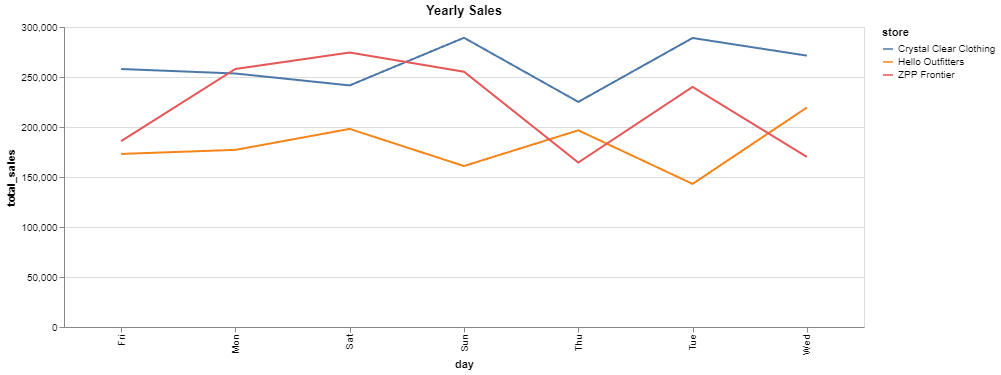

In [ ]:
import random
import pandas as pd  # Import pandas for data manipulation and analysis.
import os
import altair as alt #Import Altair for data visualization.
from IPython.display import display, HTML # Import display and HTML for displaying content in Notebooks.


In [ ]:
# Create a corporation object
corp = Corporation("Vincent's Amazing Corporation")

# Create some store objects and add them to the corporation
store1 = Stand("Crystal Clear Clothing")
store2 = Stand("ZPP Frontier")
store3 = Stand("Hello Outfitters")
corp.add_stand(store1)
corp.add_stand(store2)
corp.add_stand(store3)

# Define a list of customer names
customer_names = ["alex", "jeff", "zoe", "bob", "stefan", "daniel"]

# Add customers to the stores
for name in customer_names:
    store1.add_customer(Customer(name))
    store2.add_customer(Customer(name))
    store3.add_customer(Customer(name))

# Simulate the corporation for a year
yearly_sales = corp.simulate_year()

# Output: yearly_sales DataFrame
print("Yearly Sales Data:")
print(yearly_sales.head())  # Display the first few rows of the yearly sales data

Yearly Sales Data:
   day  total_sales                   store
0  Tue      4106.03  Crystal Clear Clothing
1  Wed      7163.40  Crystal Clear Clothing
2  Fri      5599.85  Crystal Clear Clothing
3  Thu      5556.62  Crystal Clear Clothing
4  Thu      4898.62  Crystal Clear Clothing


instantiates a Corporation object and several Stand objects representing stores. then adds customers to each store, simulates a year of sales for the corporation, and prints out the resulting DataFrame containing the yearly sales data.

In [ ]:
# Calculate weekly sales for each store
weekly_sales = yearly_sales.groupby(['store', 'day']).sum().reset_index()

# Output: weekly_sales DataFrame
print("Weekly Sales Data:")
print(weekly_sales.head())  # Display the first few rows of the weekly sales data

# Create a DataFrame from the weekly sales data
df = pd.DataFrame(weekly_sales)

# Display the DataFrame
display(df)

Weekly Sales Data:
                    store  day  total_sales
0  Crystal Clear Clothing  Fri    257992.31
1  Crystal Clear Clothing  Mon    253494.76
2  Crystal Clear Clothing  Sat    241587.92
3  Crystal Clear Clothing  Sun    289241.49
4  Crystal Clear Clothing  Thu    225106.01


,store,day,total_sales
0,Crystal Clear Clothing,Fri,257992.31
1,Crystal Clear Clothing,Mon,253494.76
2,Crystal Clear Clothing,Sat,241587.92
3,Crystal Clear Clothing,Sun,289241.49
4,Crystal Clear Clothing,Thu,225106.01
5,Crystal Clear Clothing,Tue,289003.68
6,Crystal Clear Clothing,Wed,271354.30
7,Hello Outfitters,Fri,173073.65
8,Hello Outfitters,Mon,177137.95
9,Hello Outfitters,Sat,198088.63


aggregates the yearly sales data by store and day to calculate weekly sales totals, then creates and displays a DataFrame representing the weekly sales data

In [ ]:
# Calculate the variance for each store
grouped_variance = df.groupby('store')['total_sales'].var().rename("variance")

# Output: Variance for each store
print("Variance in Weekly Sales for Each Store:")
print(grouped_variance)

# Rank the stores by variance
ranked_stores = grouped_variance.sort_values(ascending=False)

# Output: Ranked stores by variance
print("Stores Ranked by Variance in Weekly Sales:")
print(ranked_stores)

Variance in Weekly Sales for Each Store:
store
Crystal Clear Clothing    5.699158e+08
Hello Outfitters          6.546708e+08
ZPP Frontier              2.133731e+09
Name: variance, dtype: float64
Stores Ranked by Variance in Weekly Sales:
store
ZPP Frontier              2.133731e+09
Hello Outfitters          6.546708e+08
Crystal Clear Clothing    5.699158e+08
Name: variance, dtype: float64


calculates the variance of weekly sales for each store by grouping the weekly sales data by store and computing the variance of total sales, then prints and ranks the stores based on their variance in weekly sales.

In [ ]:
# Graph the entire year of sales using Altair
chart = alt.Chart(weekly_sales, width=800, height=300).mark_line().encode(
    x='day',
    y='total_sales',
    color='store'
).properties(
    title='Yearly Sales'
)

# Save the chart as an HTML file
chart_html = 'chart.html'
chart.save(chart_html)

# Read the HTML file content
with open(chart_html, 'r') as file:
    chart_content = file.read()

# Display the Altair chart
display(HTML(chart_content))

# Output: Display the Altair chart embedded in the notebook

 utilizes Altair to graphically represent the yearly sales data, saves the chart as an HTML file, reads the file content, and then displays the chart within the notebook.